In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, roc_auc_score, r2_score
from scipy import stats

# 评估函数

In [2]:
def evaluate_regression(y_true, y_pred):
    y_true = y_true.values
    y_pred = y_pred.values
    
    print("以下为两数据集的回归评估值")
    print("MAE: ", mean_absolute_error(y_true, y_pred))
    print("MSE: ", mean_squared_error(y_true, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R^2: ", r2_score(y_true, y_pred))
    print("PCC: ", stats.pearsonr(y_true, y_pred)[0])
    

def evaluate_classification(y_true, y_pred):
    y_true = y_true.values
    y_pred = y_pred.values
    
    print("以下为两数据集的分类评估值")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("AUC: ", roc_auc_score(y_true, y_pred))
    print("TIC: ", np.sqrt(np.sum((y_true - y_pred) ** 2) / len(y_true)) / (np.sqrt(np.sum(y_true ** 2) / len(y_true)) + np.sqrt(np.sum(y_pred ** 2)/ len(y_pred))))
    print("TIC: ", sum(np.abs((y_true - y_pred)/y_true))/len(y_true)*100)
    print("TIC: ", ((np.sum(np.abs((y_true - y_pred)) / (np.sum(y_true) / len(y_true)))) / len(y_true)) * 100)

# 读取测试数据

In [3]:
test_dataset = pd.read_csv("D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\Common\excllent_ProThermDB_Testing4Comparison.csv")
regression_label = test_dataset["ΔTm"]
classification_label = test_dataset["ΔTm"].apply(lambda x: 1 if x > 0 else -1)
test_dataset

,UniProt_ID,Mutation,ΔTm,PDB_Chain_Mutation,PDB_ID,Chain,PDB_Mutation,HotMuSiC,AUTO-MUTE2.0-AdaClass,AUTOMUTE2.0-SVM,AUTO-MUTE2.0-REPTree,AUTO-MUTE2.0-SVR,MPTherm-pred
0,P03050,S5A,-1.50,1arr_A:S5A,1arr,A,S5A,-4.19,-1,-1,-2.50,-1.50,-2.761
1,Q13526,T29A,-14.30,1pin_A:T29A,1pin,A,T29A,-8.83,-,-,-,-,-10.837
2,P07845,Y111N,0.00,1gwy_A:Y111N,1gwy,A,Y111N,-3.58,-1,-1,-2.70,-1.80,-5.861
3,P00711,D106N,19.60,1hfz_A:D87N,1hfz,A,D87N,-1.55,-,-,-,-,-7.088
4,Q15059,H395R,-2.60,3s92_A:H395R,3s92,A,H395R,-2.59,-,-,-,-,-7.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,P61495,H179K,-1.05,1osi_A:H179K,1osi,A,H179K,0.42,-1,-1,-15.21,-3.67,-1.236
263,P00044,F16M,-15.20,1ycc_A:F10M,1ycc,A,F10M,-3.94,-,-,-,-,-3.561
264,P00644,T144Q,-12.95,1stn_A:T62Q,1stn,A,T62Q,-2.91,-1,-1,-1.51,-5.19,-1.162
265,P05798,L21A,-1.60,1rgg_A:L21A,1rgg,A,L21A,-3.80,-1,1,-12.42,1.12,-6.895


In [4]:
regression_label

0      -1.50
1     -14.30
2       0.00
3      19.60
4      -2.60
       ...  
262    -1.05
263   -15.20
264   -12.95
265    -1.60
266    -9.10
Name: ΔTm, Length: 267, dtype: float64

In [5]:
classification_label

0     -1
1     -1
2     -1
3      1
4     -1
      ..
262   -1
263   -1
264   -1
265   -1
266   -1
Name: ΔTm, Length: 267, dtype: int64

# 2.获取MPTherm-pred对该测试集的预测效果

In [6]:
MPTherm_result = test_dataset["MPTherm-pred"][test_dataset["MPTherm-pred"] != "-"]
print("MPTherm-pred合法的数据有{}".format(len(MPTherm_result)))
evaluate_regression(regression_label, MPTherm_result)
MPTherm_result

MPTherm-pred合法的数据有267
以下为两数据集的回归评估值
MAE:  7.068694964627547
MSE:  87.05723405900032
RMSE:  9.330446616266572
R^2:  -0.19142851466867317
PCC:  0.17566706045549962


0      -2.761
1     -10.837
2      -5.861
3      -7.088
4      -7.988
        ...  
262    -1.236
263    -3.561
264    -1.162
265    -6.895
266   -12.278
Name: MPTherm-pred, Length: 267, dtype: float64

In [9]:
actual = test_dataset["ΔTm"]
residuals = test_dataset["MPTherm-pred"] -  test_dataset["ΔTm"]

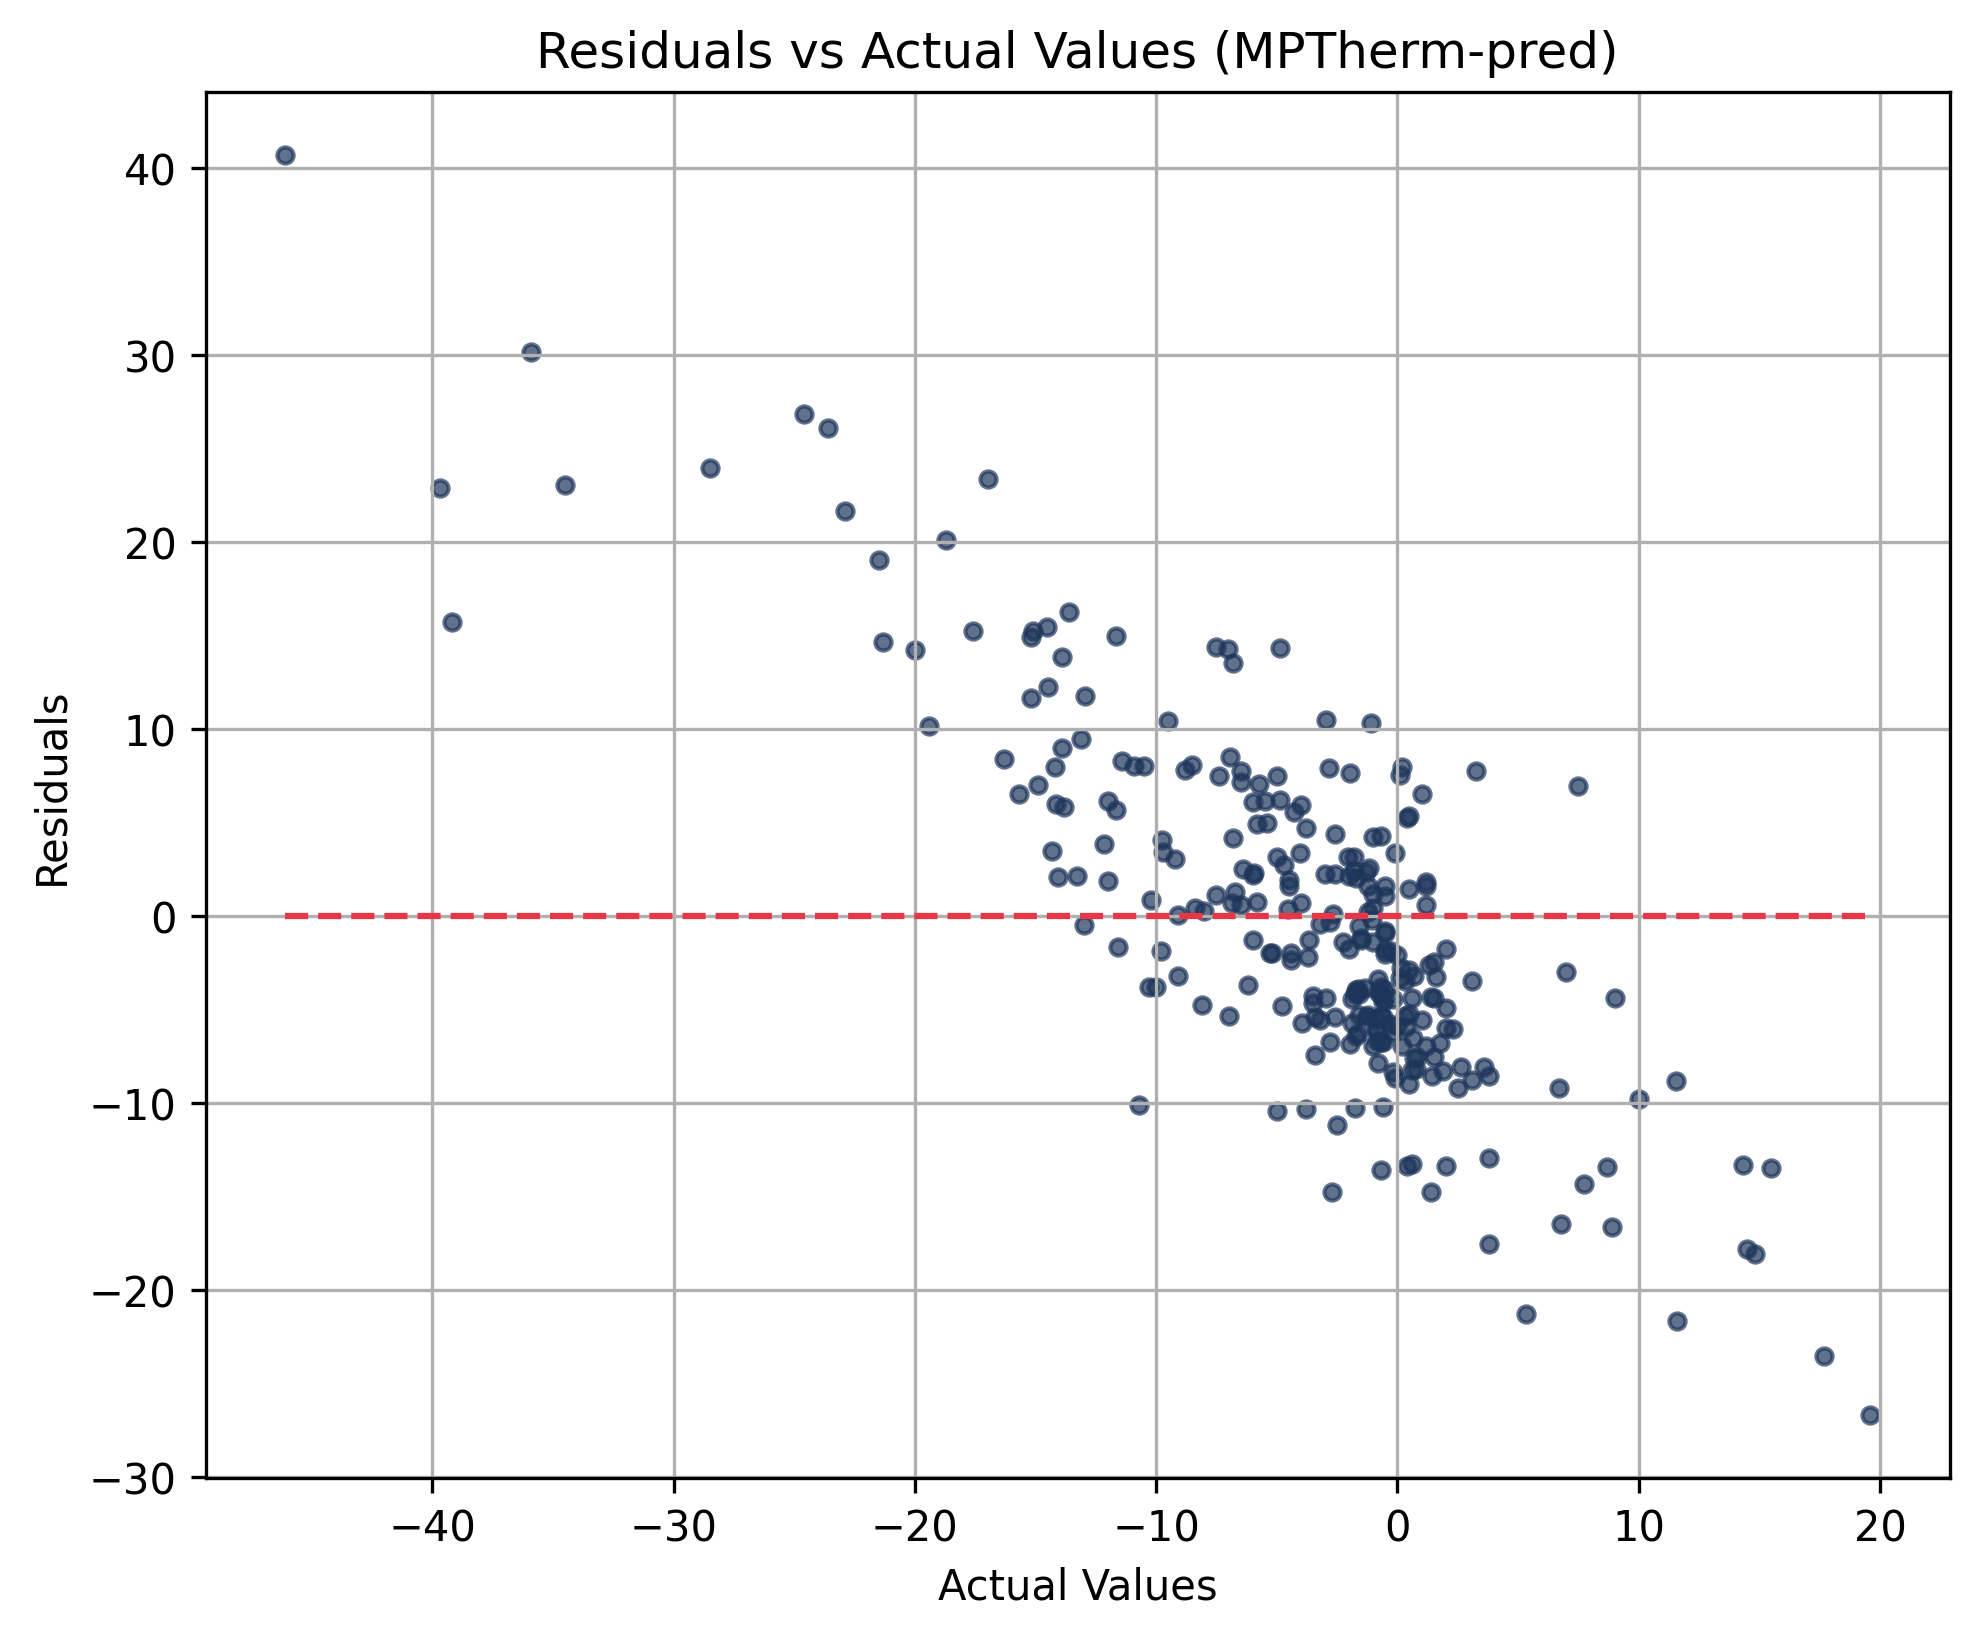

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7.5, 6), dpi=300)
plt.scatter(actual, residuals, alpha=0.7, color="#1d355a", s=15)
plt.hlines(y=0, xmin=min(actual), xmax=max(actual), colors="#e83647", linestyles='dashed')
plt.title('Residuals vs Actual Values (MPTherm-pred)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3.获取AutoMute2对该数据集的预测效果

In [45]:
automute_result = test_dataset[["AUTO-MUTE2.0-AdaClass", "AUTOMUTE2.0-SVM", "AUTO-MUTE2.0-REPTree", "AUTO-MUTE2.0-SVR"]][test_dataset["AUTO-MUTE2.0-AdaClass"] != "-"]
automute_indexs = test_dataset[test_dataset["AUTO-MUTE2.0-AdaClass"] != "-"].index
automute_result

,AUTO-MUTE2.0-AdaClass,AUTOMUTE2.0-SVM,AUTO-MUTE2.0-REPTree,AUTO-MUTE2.0-SVR
0,-1,-1,-2.50,-1.50
2,-1,-1,-2.70,-1.80
6,1,1,-3.89,1.40
8,-1,-1,-2.70,-0.70
10,1,-1,-4.84,-3.78
...,...,...,...,...
256,-1,-1,-2.43,-3.78
257,1,-1,-2.03,-0.95
262,-1,-1,-15.21,-3.67
264,-1,-1,-1.51,-5.19


## 3.1.AdaBoostM1/C4.5

In [46]:
automute_ada_class_result = automute_result["AUTO-MUTE2.0-AdaClass"].astype(int)
evaluate_classification(classification_label.iloc[automute_indexs], automute_ada_class_result)
automute_ada_class_result

以下为两数据集的分类评估值
Accuracy:  0.6948051948051948
AUC:  0.6102032264822963
TIC:  0.5524443910429403
TIC:  61.038961038961034
TIC:  -138.23529411764704


0     -1
2     -1
6      1
8     -1
10     1
      ..
256   -1
257    1
262   -1
264   -1
265   -1
Name: AUTO-MUTE2.0-AdaClass, Length: 154, dtype: int32

## 3.2.Support Vector Machine

In [47]:
automute_svm_class_result = automute_result["AUTOMUTE2.0-SVM"].astype(int)
evaluate_classification(classification_label.iloc[automute_indexs], automute_svm_class_result)
automute_svm_class_result

以下为两数据集的分类评估值
Accuracy:  0.7467532467532467
AUC:  0.6106222501571339
TIC:  0.5032362797401965
TIC:  50.649350649350644
TIC:  -114.70588235294119


0     -1
2     -1
6      1
8     -1
10    -1
      ..
256   -1
257   -1
262   -1
264   -1
265    1
Name: AUTOMUTE2.0-SVM, Length: 154, dtype: int32

## 3.3.Tree Regression (REPTree)

In [48]:
automute_reptree_class_result = automute_result["AUTO-MUTE2.0-REPTree"].astype(float)
evaluate_regression(regression_label.iloc[automute_indexs], automute_reptree_class_result)
automute_reptree_class_result

以下为两数据集的回归评估值
MAE:  5.568791486291487
MSE:  61.81128932379349
RMSE:  7.862015601853859
R^2:  0.10155281839629726
PCC:  0.3781472886428766


0      -2.50
2      -2.70
6      -3.89
8      -2.70
10     -4.84
       ...  
256    -2.43
257    -2.03
262   -15.21
264    -1.51
265   -12.42
Name: AUTO-MUTE2.0-REPTree, Length: 154, dtype: float64

## 3.4.SVM Regression

In [49]:
automute_svr_class_result = automute_result["AUTO-MUTE2.0-SVR"].astype(float)
evaluate_regression(regression_label.iloc[automute_indexs], automute_svr_class_result)
automute_svr_class_result

以下为两数据集的回归评估值
MAE:  4.777059884559885
MSE:  49.861253825957995
RMSE:  7.061250160273179
R^2:  0.2752504686241114
PCC:  0.5346793672087378


0     -1.50
2     -1.80
6      1.40
8     -0.70
10    -3.78
       ... 
256   -3.78
257   -0.95
262   -3.67
264   -5.19
265    1.12
Name: AUTO-MUTE2.0-SVR, Length: 154, dtype: float64

# 4.获取HotMuSiC对该数据集的预测效果

In [51]:
hotmusic_result = test_dataset["HotMuSiC"][test_dataset["HotMuSiC"] != "-"].astype(float)
hotmusic_index = test_dataset[test_dataset["HotMuSiC"] != "-"].index
evaluate_regression(regression_label.iloc[hotmusic_index], hotmusic_result)
hotmusic_result

以下为两数据集的回归评估值
MAE:  4.747022306397307
MSE:  54.21416679409839
RMSE:  7.3630270129952935
R^2:  0.2638765386176496
PCC:  0.5640617485430537


0     -4.19
1     -8.83
2     -3.58
3     -1.55
4     -2.59
       ... 
262    0.42
263   -3.94
264   -2.91
265   -3.80
266   -4.54
Name: HotMuSiC, Length: 264, dtype: float64